# A Gentle Introduction to  PyTorch



---


**Requisites to run it locally, outside colab (not recommended)**

*   Python 3.x
*   Jupyter
*   PyTorch 0.4.0
*   Numpy
*   Matplolib
---



## Google Colaboratory

First of all, take a moment to look around and discover Google Colab if you haven't before! You can run the commands below to understand how much resources you're using and are still available. Then consider also that you can also connect your Google Drive for additional space or for easily loading your own files.

You can always reset the entire VM with "*Runtime > Reset all runtime*" in case of difficulty. Make also sure you're using the GPU or TPU in the same  tab ("*Runtime > Change runtime type*").

In [0]:
!free -m
!df -h
!nvidia-smi # <Ctrl> + <Return>

              total        used        free      shared  buff/cache   available
Mem:          13022         449       10757           0        1815       12300
Swap:             0           0           0
Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   23G  318G   7% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       365G   27G  339G   8% /opt/bin
shm             6.0G     0  6.0G   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware
Mon Feb 25 15:27:37 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Uti

###  How to connect your G Drive with G Colab?



In [0]:
from google.colab import files
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# This is an example for connecting csv file with pandas, see how to invocate the directory: '/content/drive/My Drive/path/file.csv' 
# df = pd.read_csv('/content/drive/My Drive/path/file.csv', sep=',')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Python native data types

Python has many native datatypes. Here are the important ones:

 - **Booleans** are either `True` or `False`.
 - **Numbers** can be integers (1 and 2), floats (1.1 and 1.2), fractions (1/2 and 2/3), or even complex numbers.
 - **Strings** are sequences of Unicode characters, e.g. an html document.
 - **Lists** are ordered sequences of values.
 - **Tuples** are ordered, immutable sequences of values.
 - **Sets** are unordered bags of values.
 - **Dictionaries** are unordered bags of key-value pairs.
 
See [here](http://www.diveintopython3.net/native-datatypes.html) for a complete overview.

### More resources

 1. Brief Python introduction [here](https://learnxinyminutes.com/docs/python3/).
 2. Full Python tutorial [here](https://docs.python.org/3/tutorial/).
 3. A Whirlwind Tour of Python [here](https://github.com/jakevdp/WhirlwindTourOfPython).
 4. Python Data Science Handbook [here](https://github.com/jakevdp/PythonDataScienceHandbook).

##What is Pytorch?
It's is a famous Python based scientific computing package targeted at two sets of audiences:



*   Tensorial library that uses power of Graphics Processing Units (GPU's)
*   A Deep Learning research plattform that provides maximum flexitibility and speed



## Installing PyTorch 0.4.0

Tensorflow is installed by default in Google Colab (guess why :P). If you want to use another DL toolkit you have to do it by yourself. Run the command below to install it. It should take less than a couple of minutes.

In [0]:
# http://pytorch.org/
!pip install http://download.pytorch.org/whl/cu80/torch-0.4.0-cp36-cp36m-linux_x86_64.whl 
!pip install torchvision

import torch
print('Torch', torch.__version__, 'CUDA', torch.version.cuda)

Torch 0.4.0 CUDA 8.0.61


**Ok, torch is installed and imported! Let' see if it can see the GPU:**

In [0]:
import torch
torch.cuda.is_available()

True

**Question to explore:**

*   What's new in Pythorch 0.4?

Some tips here: https://pytorch.org/blog/pytorch-0_4_0-migration-guide/

**That's great, let us import then a few libraries, which we'll be using during this tutorial!**

In [0]:
import torch

In [0]:
# switch to False to use CPU
use_cuda = True

use_cuda = use_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu");
torch.manual_seed(1);

###Getting help in Jupyter

In [0]:
# What about all `*Tensor`s?
# Press <esc> to get out of help
torch.*Tensor?

In [0]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

In [0]:
# Annotate your functions / classes!
torch.nn.Module?

In [0]:
torch.nn.Module??

In [0]:
# List all the files in the current directory
!ls -lh

total 8.0K
drwx------ 3 root root 4.0K Feb 25 15:36 drive
drwxr-xr-x 1 root root 4.0K Feb 15 17:21 sample_data


##Torch! 
 Now let's see how to work with Tensors

In [0]:
# Generate a tensor of size 3x3x4
t = torch.Tensor(3, 3, 4)
type(t)

torch.Tensor

In [0]:
# Get the size of the tensor
t.size()

torch.Size([3, 3, 4])

In [0]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 3 × 3 × 4


In [0]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 36 dimensional space
organised in 3 sub-dimensions


In [0]:
t

tensor([[[ 1.0379e-37,  0.0000e+00,  1.2472e-43,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00, -1.5249e+30,  7.0295e+28,  6.1949e-04]],

        [[ 2.3328e-18,  6.9776e+22,  6.1972e-04,  7.2443e+22],
         [ 7.7052e+31,  1.6533e+19,  7.7140e+31,  3.3806e-18],
         [ 1.0900e+27,  2.3364e-18,  4.5447e+30,  3.0750e+29]],

        [[ 1.9284e+31,  1.8891e+31,  2.0871e+37,  1.0887e+27],
         [ 1.7830e+19,  1.7262e+25,  2.1975e+23,  7.1846e+22],
         [ 2.5048e+07,  5.0625e-30, -5.8872e+21,  4.5872e-41]]])

In [0]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[5., 9., 4., 8.],
         [3., 3., 1., 1.],
         [9., 2., 8., 9.]],

        [[6., 3., 3., 0.],
         [2., 1., 2., 6.],
         [0., 3., 6., 4.]],

        [[3., 6., 4., 2.],
         [9., 4., 8., 6.],
         [7., 3., 7., 3.]]])

In [0]:
# This resizes the tensor permanently 
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[5., 9., 4., 8., 3., 3., 1., 1.],
        [9., 2., 8., 9., 6., 3., 3., 0.],
        [2., 1., 2., 6., 0., 3., 6., 4.]])

In [0]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [0]:
# This *is* important, sigh...
s = r.clone()

# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [0]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

##Vectors (1D Tensors)

In [0]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [0]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [0]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [0]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [0]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [0]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([3., 6., 2., 0., 5.])

In [0]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 3.0, last: 5.0


In [0]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([6., 2.])

In [0]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [0]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


##Matrices (2D Tensors)

In [0]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [0]:
m.dim()

2

In [0]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [0]:
# Returns the total number of elements, hence num-el (number of elements)
m.numel()

8

In [0]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [0]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [0]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [0]:
# Indexing column 1, all rows (returns size 2x2)
m[:, [1]]

tensor([[5.],
        [2.]])

In [0]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [0]:
# Indexes row 0, all columns (returns size 4)
m[0, :]

tensor([2., 5., 3., 7.])

In [0]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [0]:
# Scalar product
m @ v

tensor([49., 47.])

In [0]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [0]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.7115, 4.1250, 2.4941, 6.7634],
        [3.2430, 1.7654, 0.3529, 8.6444]])

In [0]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[0.8904, 0.0965, 0.7848, 5.3992],
        [1.5138, 1.9960, 0.9008, 4.2893]])

In [0]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[12.0295,  6.2152,  4.5789, 39.5950],
        [ 4.8498,  2.4890,  1.0599, 40.9612]])

In [0]:
print(m.size())

# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

torch.Size([2, 4])


tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

##Constructors

In [0]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [0]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [0]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [0]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [0]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [0]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [0]:
# Set default plots
#from plot_lib import set_default
from matplotlib import pyplot as plt
#set_default()

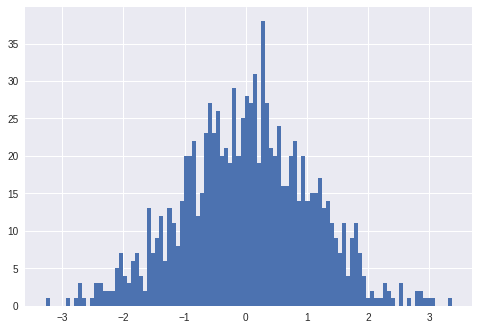

In [0]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

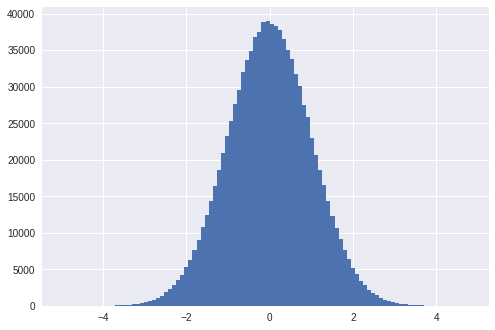

In [0]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF!

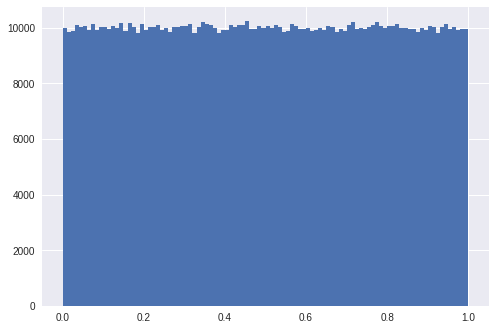

In [0]:
plt.hist(torch.rand(10**6).numpy(), 100);

**Questions to explore:**





See the accompanying LICENSE file in the GitHub repository for terms. 

Date: 16-04-2019                                                             
Author: Alexander Robles                                                  
E-mail: alexander.robles20@gmail.com                                           
                                             